# The 3-3-4-3-4 tiling
By which I mean

<img src="33434.png" width=40%>

This tiling is 2-regular according to Grünbaum and Shephard. From a cartographic perspective, it may be of interest, because it has 6 distinct tiles i.e. tiles distinguishable by shape and/orientation that can be separately symbolised. This property is related to the notion of transitivity groups in tilings. 

If the base-to-base triangles are merged then an alternate version with squares and rhombuses is available with 4 distinct tile types.

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import geopandas as gpd

from tile_map import Tiling
from tile_units import TileUnit

ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

## The 3<sup>2</sup>.4.3.4 tiling
Set up some dimensions for simplicity. Spacing will be the base square tile dimension. s is the edge dimension of the square and h is the height of the equilateral triangle with that edge length.

<AxesSubplot:>

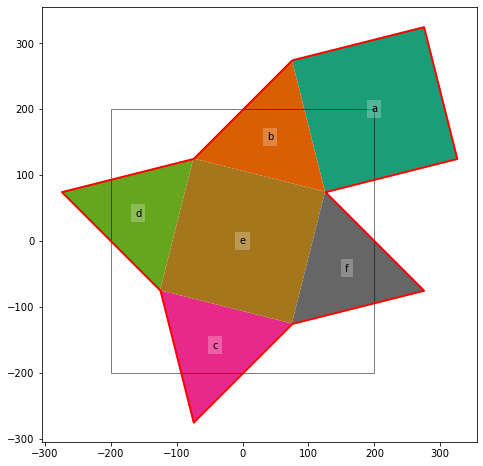

In [2]:
tile_unit = TileUnit(tiling_type = "archimedean", spacing = 400,
                     code = "3.3.4.3.4", crs = ak.crs)
tile_unit.plot()

In [3]:
tiling = Tiling(tile_unit, ak, id_var = "DZ2018")

In [4]:
tiled_map = tiling.get_tiled_map(prioritise_tiles = True, rotation = 15)

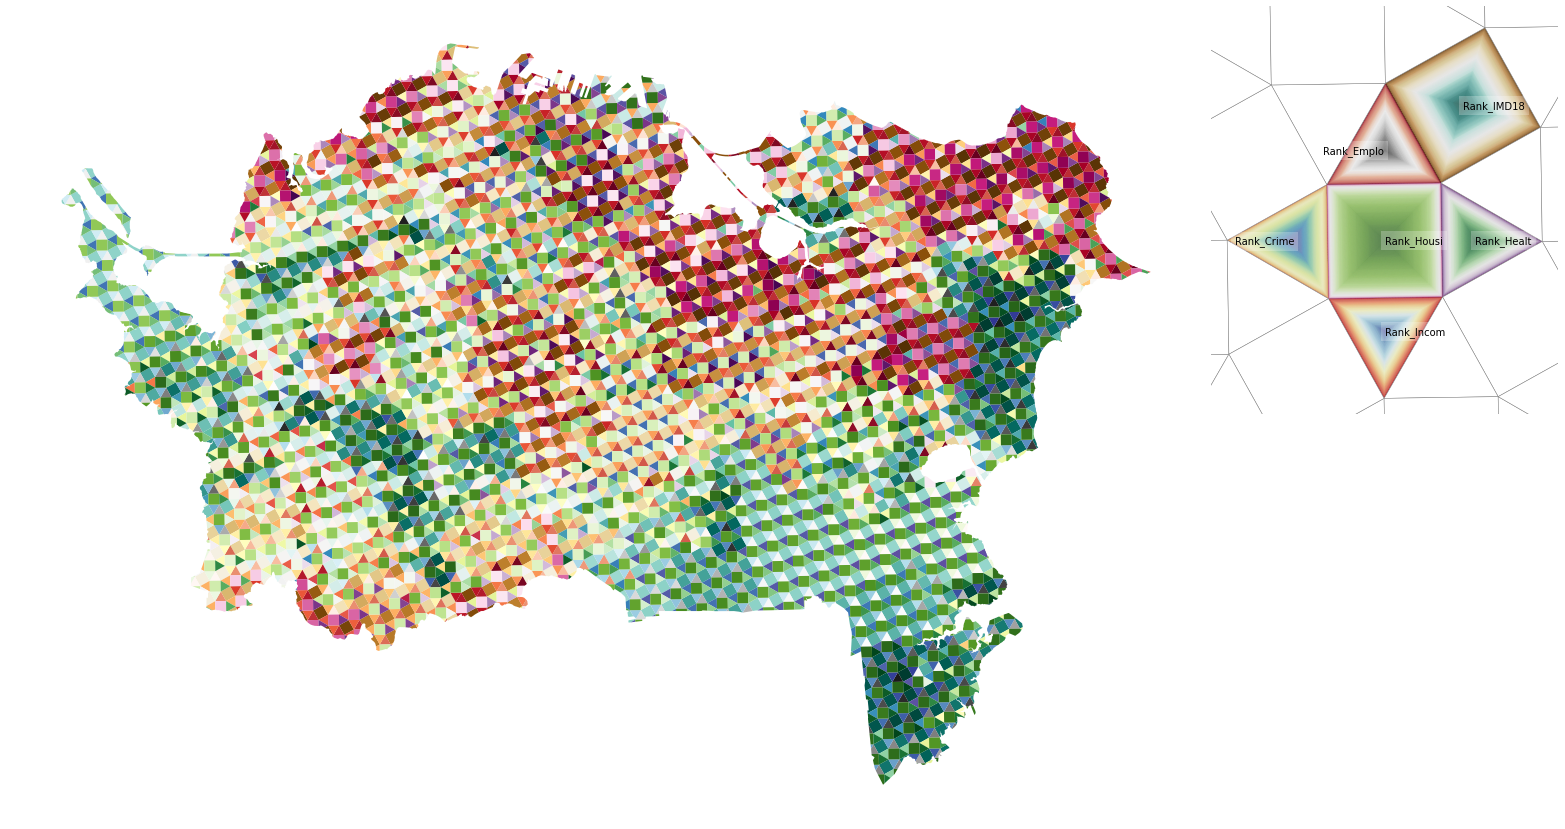

In [5]:
fig = pyplot.figure(figsize = (24, 15))

ids = sorted(set(tiled_map.element_id))
cols = dict(zip(ids, [x for x in tiled_map.columns if "Rank" in x]))
cmaps = dict(zip(ids, ("BrBG", "RdGy", "RdYlBu", "Spectral",
                       "PiYG", "PRGn", "PuOr", "viridis")))

tiling.plot_map(fig, tiled_map, cols, cmaps, legend = True)